# Vorbemerkungen
Um das Problem numerisch anzugehen, muss bei einer endlichen Geschwindigkeit abgebrochen werden. Wir tun dies bei $v=100$, da $f(v)$ dort vernachlässigbar klein wird.


$f(v)$ ist für $v<0$ einfach 0, bzw. nicht definiert, da die *betragsmäßige* Geschwindigkeit betrachtet wird!


Die Normierungskonstante haben wir bestimmt zu:
$$ N = \frac{1}{4\sqrt{2}} \left(\frac{m}{\pi k_\text{B} T}\right)^{3/2} $$ (siehe PDF)

In [1]:
import numpy as np
import scipy as sp
import scipy.signal
import matplotlib.pyplot as plt

In [2]:
def f(v):
    k_B = 1.381e-23
    m = 3e-23 # Test
    T = 293.15 # Test
    #N = (m / (np.pi * k_B * T))**(3/2) / (4 * 2**.5) # wie im PDF
    N = (m / (np.pi * k_B * T))**(3/2) / (2 * 2**.5) # so stimmt die Normierung, s.u.
    return N * np.exp(- (m * v**2)/(2 * k_B * T)) * 4 * np.pi * v**2

In [3]:
num_count = 1000000
v_linspace = np.linspace(0, 100, num_count)
resolution = 100 / num_count
f_vals = f(v_linspace)

Für unsere Obergrenze für $v$ sollte $f(v)$ hinreichend klein sein:

In [4]:
assert f_vals[-1] < 1e-10
f_vals[-1]

4.124436836762571e-16

Das Integral über $\mathbb{R}^+$ sollte 1 geben:

In [5]:
full_int = sp.integrate.quad(f, 0, np.inf)[0]
assert np.isclose(full_int, 1)

## (a) die wahrscheinlichste Geschwindigkeit $v_m$
Weil die Wahrscheinlichkeitsdichte-Funktion stetig etc. ist, können wir annehmen, dass die wahrscheinlichste Geschwindigkeit diejenige ist, unter welcher die Wahrscheinlichkeitsdichte maximal ist. 
Dennoch sei darauf hingewiesen, dass die Wahrscheinlichkeit für einen präzisen Wert immer 0 ist!

In [6]:
v_peak_index = np.argmax(f_vals)
v_peak = v_peak_index * resolution
v_peak

16.4284

## (b) der Mittelwert der Geschwindigkeit $\langle v \rangle$

In [7]:
#TODO
sp.ndimage.median(f_vals)

0.00010388640880553006

## (c) der Median der Geschwindigkeit $v_{0.5}$

In [8]:
# solange ich keine SciPy-Methode finde, tut's auch BruteForce :P
for v in v_linspace:
    result = sp.integrate.quad(f, 0, v)[0]
    if result > 0.5:
        v_median = v
        break

v_median

17.86851786851787

## (d) die volle Breite auf halber Höhe der Verteilung ($v_\text{FWHM}$ )

In [9]:
peaks, _ = sp.signal.find_peaks(f_vals)
widths, width_heights, left_ips, right_ips = sp.signal.peak_widths(f_vals, peaks, rel_height=0.5)
#widths, width_heights, left_ips, right_ips = sp.signal.peak_widths(f_vals, [v_peak], rel_height=0.5)

v_FWHM = widths[0] * resolution
v_FWHM

18.973875001224982

## (e) die Standardabweichung der Geschwindigkeit $\sigma_v$

In [10]:
#TODO

## …und aus alledem ein Plot…

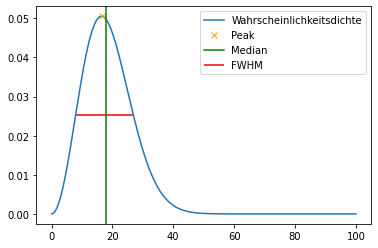

In [11]:
plt.figure()
plt.plot(v_linspace, f_vals, label='Wahrscheinlichkeitsdichte')
plt.plot(v_peak, f_vals[v_peak_index], 'x', color='orange', label='Peak')
plt.hlines(width_heights, left_ips * resolution, right_ips * resolution, color='red', label='FWHM')
plt.axvline(v_median, color='green', label='Median')
plt.legend()